In [451]:
# Hitaansh Gaur
# Period 7 ML
# Gradient Descent Lab

from random import random
from typing import List, Tuple
import matplotlib.pyplot as plt
import numpy as np

In [452]:
def genPoints() -> List[Tuple[float, float]]:
    points = [(random(), random()) for x in range(100)]
    return points

In [453]:
def loss(slope: float, intercept: float, points: List[Tuple[float, float]]) -> Tuple[float, float]:
    errorSlope = sum([2 * (slope * x + intercept - y) * x for x,y in points])
    errorIntercept = sum([2 * (slope * x + intercept - y) for x,y in points])

    return errorSlope, errorIntercept

In [454]:
def descent(alpha: float, slope: float, intercept: float, points: List[Tuple[float, float]]) -> Tuple[float, float, int, List, List, List, List]:
    iterations = 0
    error = loss(slope, intercept, points)
    magnitude = pow(error[0] * error[0] + error[1] * error[1], .5)
    error_list = [magnitude]
    slope_list = [slope]
    intercept_list = [intercept]
    while magnitude > 0.0005 and iterations < 10000:
        slope -= alpha*error[0]
        intercept -= alpha*error[1]
        error = loss(slope, intercept, points)
        magnitude = (error[0] * error[0] + error[1] * error[1]) ** 0.5
        error_list.append(magnitude)
        slope_list.append(slope)
        intercept_list.append(intercept)
        iterations += 1

    return slope, intercept, iterations, error_list, slope_list, intercept_list, error

In [455]:
def scatter_plot(x_points, y_points, line_y_points):
    fig = plt.figure()
    graph = fig.add_subplot(111)

    graph.scatter(x_points, y_points, c="b")
    graph.plot(x_points, line_y_points, "g")
    graph.set_title("Scatter plot with regression line")
    graph.set_ylabel("Y Points")
    graph.set_xlabel("X Points")

In [456]:
def loss_plot(old_error_list):
    fig = plt.figure()
    graph = fig.add_subplot(111)
    graph.plot(old_error_list, "r")

    graph.set_title("Loss verses Iterations")
    graph.set_ylabel("Loss")
    graph.set_xlabel("Number of Iterations")

In [457]:
def alpha_iterations_plot(alpha_ranges, iteration_count):
    fig = plt.figure()
    graph = fig.add_subplot(111)

    graph.plot(alpha_ranges, iteration_count, "b")
    graph.set_title("Iterations verses Alpha")
    graph.set_ylabel("Amount of Iterations")
    graph.set_xlabel("Values of Alpha")

In [458]:
def three_dimensional_plot(slope_list, intercept_list, points):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection = "3d")
    M = []
    B = []
    Z = []
    my_Z = []

    for m in np.linspace(-5.0,5.0,400):
        for b in np.linspace(-1.0,1.0,400):
                M.append(m)
                B.append(b)
                Z.append(sum([((m * x + b) - y) ** 2 for x,y in points]))

    for my_m, my_b in zip(slope_list, intercept_list):
        my_Z.append(sum([((my_m * x + my_b) - y) ** 2 for x,y in points]))

    ax.plot(M, B, Z)
    ax.scatter(slope_list, intercept_list, my_Z, c = "r")
    ax.set_title("L(m,b) with points")
    ax.set_xlabel("Slope")
    ax.set_ylabel("Intercept")
    ax.set_zlabel("L(Slope, Intercept)")


Alpha: 0.0005 
Slope: 0.1800470899446657 
Intercept: 0.38463933034975994 
Iterations: 1390


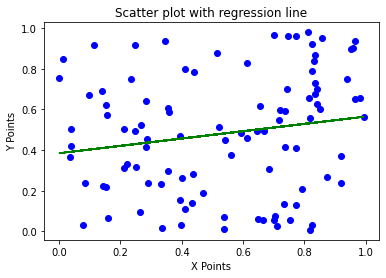

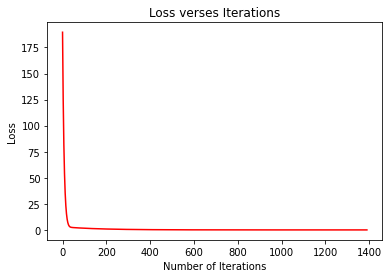

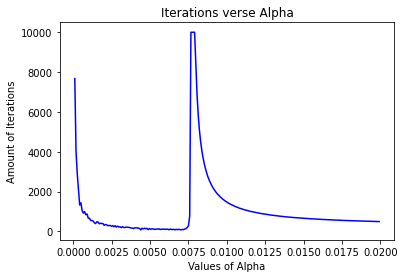

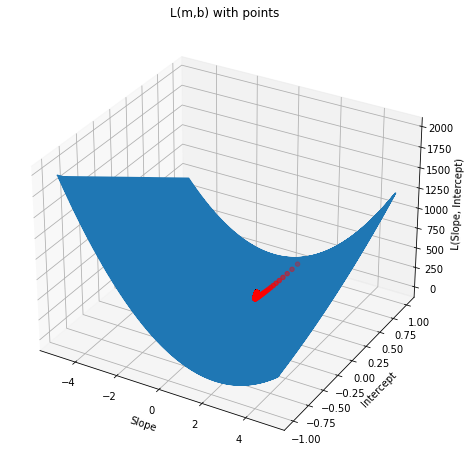

In [459]:
slope, intercept = random(), random()
alpha = 0.0005
points = genPoints()
x_points = [point[0] for point in points]
y_points = [point[1] for point in points]

slope, intercept, old_iterations, old_error_list, old_slope_list, old_intercept_list, error = descent(alpha, slope, intercept, points)

line_y_points = [((slope * x) + intercept) for x in x_points]

print("Alpha: {} \nSlope: {} \nIntercept: {} \nIterations: {}".format(alpha, slope, intercept, old_iterations))


alpha_ranges = [0.0001 + x*(0.02 - 0.0001)/250 for x in range(250)]
iteration_count = []
error_list = []
for a in alpha_ranges:
    slope, intercept = random(), random()
    slope, intercept, iterations, error_list, slope_list, intercept_list, error = descent(a, slope, intercept, points)
    iteration_count.append(iterations)

scatter_plot(x_points, y_points, line_y_points)
loss_plot(old_error_list)
alpha_iterations_plot(alpha_ranges, iteration_count)
three_dimensional_plot(old_slope_list, old_intercept_list, points)
